## Create Adversarial Images

In [1]:
################################################
##
## Create Adversarial Images
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import os
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

from matplotlib import cm
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from mlxtend.plotting import heatmap
from PIL import Image, ImageDraw, ImageFilter



#######################################################

N_EPOCHS = 10000          ## 4000
batch_size = 10   ## 5    ## 32
learning_rate =  0.1    ## 0.01   ## 1e-5 


#######################################################

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

#######################################################

## Load Images

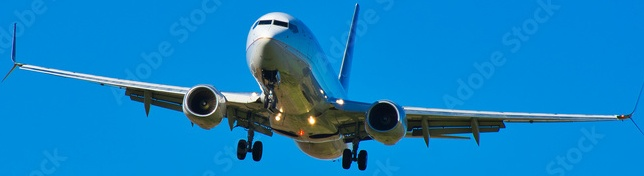

In [2]:

original_img = Image.open('data/airplane/plane2.jpg')

img_to_add   = Image.open('data/WhatToAdd/transparentBackgrounds/cloud_no_background.png')

original_img 


## Resize

In [3]:


img_to_add = img_to_add.resize((60,40))



## Paste Image

By default, the image is pasted at the position where the upper left of the paste image is the origin (upper left) of the base image.


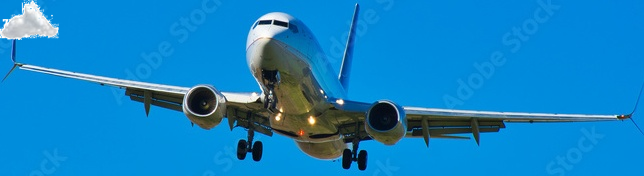

In [4]:

original_img.paste(img_to_add, mask=img_to_add)

original_img.save('data/adversarialSamples/adversarial_img12345.jpg', quality=99)

original_img


## Specify position to paste

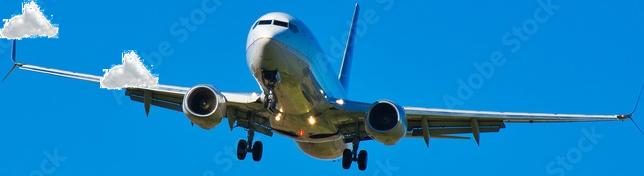

In [5]:

## original_img = Image.open('data/airplane/plane2.jpg')

original_img.paste(img_to_add, (100, 50), mask=img_to_add)

original_img.save('data/adversarialSamples/adversarial_pos.jpg', quality=99)

original_img


## Other Cloud

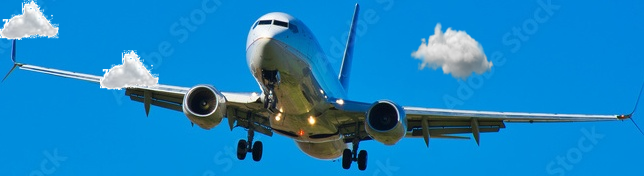

In [6]:

new_cloud  = Image.open('data/WhatToAdd/transparentBackgrounds/cloud3_no.png')

new_cloud = new_cloud.resize((100,100))

original_img.paste(new_cloud, (400, 2), mask=new_cloud)

original_img.save('data/adversarialSamples/adversarial_2_clouds.jpg', quality=99)

original_img


## Make Background Transparent

In [7]:

 
def convertImage(image, new_name):
    
    img = Image.open(image)
    img = img.convert("RGBA")
 
    datas = img.getdata()
 
    newData = []
 
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save(new_name, "PNG")
    print("Successful")
 


In [8]:

## convertImage('data/WhatToAdd/cloud21.jpg', 'data/WhatToAdd/transparentBackgrounds/cloud_no_background1.png')

convertImage('data/WhatToAdd/cloud3.png', 'data/WhatToAdd/transparentBackgrounds/cloud3_no.png')


Successful



## Other


In [9]:

mask_im = Image.new("L", img_to_add.size, 0)
draw = ImageDraw.Draw(mask_im)
draw.ellipse((140, 50, 260, 170), fill=255)
mask_im.save('data/mask_circle.jpg', quality=95)


In [10]:

back_im = original_img.copy()
back_im.paste(img_to_add, (0, 0), mask_im)
back_im.save('data/adversarialSamples/rocket_pillow_paste_mask_circle.jpg', quality=95)


## Noise Image

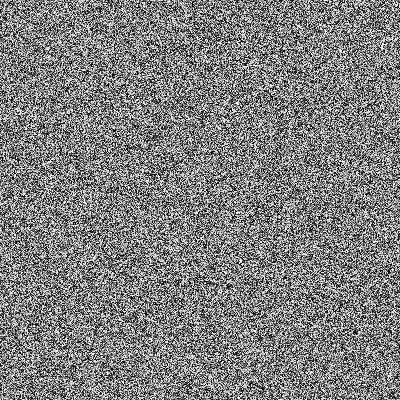

In [11]:

array = np.random.randint(255, size=(400, 400),dtype=np.uint8)
image = Image.fromarray(array)

## image.show()

image


## Numpy to Img to Numpy

In [12]:
my_img = Image.open('data/WhatToAdd/roundCloud.png')

img_np = np.array(my_img)
print(img_np.shape)

img_np = img_np[:, :, :3]

print(img_np.shape)


pil_image = Image.fromarray(img_np)

pil_image.save('data/WhatToAdd/new_roundCloud.png', quality=95)

## pil_image


(859, 840, 4)
(859, 840, 3)
